In [1]:
import numpy as np
import cvxpy as cp

# create decision variables, setting non-negative attribute to true
x = cp.Variable(nonneg=True)
y = cp.Variable(nonneg=True)

# create list of constraints
constraints = [x <= 40,
               x + y <= 80,
               2*x + y <= 100]

# create objective
objective = cp.Maximize(40*x + 30*y)

# create and solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# access numerical solution
print(f"Optimal Profit = ${problem.value:<7.2f}")
print(f"x = {x.value:4.2f}")
print(f"y = {y.value:4.2f}")

Optimal Profit = $2600.00
x = 20.00
y = 60.00


In [2]:
import numpy as np
import cvxpy as cp

c = np.array([40, 30])
A = np.array([[1, 0], [1, 1], [2, 1]])
b = np.array([40, 80, 100])

x = cp.Variable(shape=(2), nonneg=True)

constraints = [A@x <= b]
prob = cp.Problem(cp.Maximize(c@x), constraints)
prob.solve()
x.value

array([19.99999999, 60.00000001])

In [3]:
from scipy.optimize import linprog

c = [-40, -30]

A_ub = [[1, 0], 
        [1, 1], 
        [2, 1]]

b_ub = [40, 
        80, 
        100]

results = linprog(c, A_ub, b_ub)

print(results.message)
if results.success:
    print('x =', results.x)
    print('objective = ', results.fun)

Optimization terminated successfully.
x = [19.99999999 59.99999998]
objective =  -2599.9999989698435


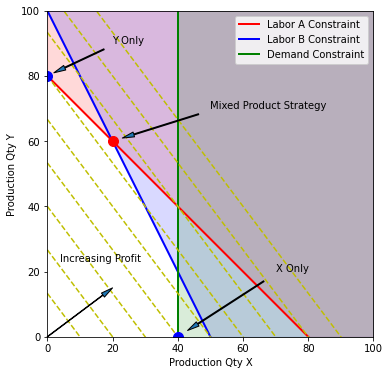

In [4]:
%matplotlib inline
from pylab import *

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,100,0,100])
xlabel('Production Qty X')
ylabel('Production Qty Y')

# Labor A constraint
x = array([0,80])
y = 80 - x
plot(x,y,'r',lw=2)
fill_between([0,80,100],[80,0,0],[100,100,100],color='r',alpha=0.15)

# Labor B constraint
x = array([0,50])
y = 100 - 2*x
plot(x,y,'b',lw=2)
fill_between([0,50,100],[100,0,0],[100,100,100],color='b',alpha=0.15)

# Demand constraint
plot([40,40],[0,100],'g',lw=2)
fill_between([40,100],[0,0],[100,100],color='g',alpha=0.15)

legend(['Labor A Constraint','Labor B Constraint','Demand Constraint'])

# Contours of constant profit
x = array([0,100])
for p in linspace(0,3600,10):
    y = (p - 40*x)/30
    plot(x,y,'y--')

# Optimum
plot(20,60,'r.',ms=20)
annotate('Mixed Product Strategy', xy=(20,60), xytext=(50,70),
         arrowprops=dict(shrink=.1,width=1,headwidth=5))

plot(0,80,'b.',ms=20)
annotate('Y Only', xy=(0,80), xytext=(20,90),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

plot(40,0,'b.',ms=20)
annotate('X Only', xy=(40,0), xytext=(70,20),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

text(4,23,'Increasing Profit')
annotate('', xy=(20,15), xytext=(0,0),
         arrowprops=dict(width=0.5,headwidth=5))

savefig('figures/LPprob01.png', bbox_inches='tight')

In [5]:
from scipy.optimize import linprog

c = [-40, -30]

A_ub = [[1, 0], 
        [1, 1], 
        [2, 1]]

b_ub = [40,
        81,    #  <<<<<< 1 additional hour of Labor A
        100]

results = linprog(c, A_ub, b_ub)

print(results.message)
if results.success:
    print('x =', results.x)
    print('objective = ', results.fun)

Optimization terminated successfully.
x = [18.99999999 61.99999997]
objective =  -2619.999998865887
